In [2]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#df = pd.read_csv('data/2021-04-10 13-01-24_v2.csv') 
# df = pd.read_csv('data/2021-04-10 15-29-34.csv') 
#df = pd.read_csv('data/2021-04-10 18-14-14.csv') 
df = pd.read_csv('data/2021-04-11 21-04-23.csv')

In [4]:
df

,time,# warm-ups since codes cleared (),Absolute load value (%),Absolute pedal position D (%),Absolute pedal position E (%),Absolute throttle position B (%),Average fuel consumption (L/100km),Average fuel consumption (total) (L/100km),Average speed (km/h),Calculated boost (bar),...,Oxygen sensor 1 Wide Range Equivalence ratio (),Oxygen sensor 2 Bank 1 Short term fuel trim (%),Oxygen sensor 2 Bank 1 Voltage (V),Relative throttle position (%),Short term fuel % trim - Bank 1 (%),Throttle position (%),Timing advance (°),Vehicle acceleration (m_sec2),Vehicle speed (km/h),Unnamed: 44
0,21:04:34.524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,21:04:34.637,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2,21:04:34.730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
3,21:04:34.821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,21:04:34.909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14234,21:35:08.692,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.105,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14235,21:35:08.771,153.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14236,21:35:08.900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14237,21:35:08.979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14.840385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.time = pd.to_datetime(df.time)

In [6]:
df = df.fillna(method='ffill')

In [7]:
df

,time,# warm-ups since codes cleared (),Absolute load value (%),Absolute pedal position D (%),Absolute pedal position E (%),Absolute throttle position B (%),Average fuel consumption (L/100km),Average fuel consumption (total) (L/100km),Average speed (km/h),Calculated boost (bar),...,Oxygen sensor 1 Wide Range Equivalence ratio (),Oxygen sensor 2 Bank 1 Short term fuel trim (%),Oxygen sensor 2 Bank 1 Voltage (V),Relative throttle position (%),Short term fuel % trim - Bank 1 (%),Throttle position (%),Timing advance (°),Vehicle acceleration (m_sec2),Vehicle speed (km/h),Unnamed: 44
0,2021-04-11 21:04:34.524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,2021-04-11 21:04:34.637,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2,2021-04-11 21:04:34.730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
3,2021-04-11 21:04:34.821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,2021-04-11 21:04:34.909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14234,2021-04-11 21:35:08.692,153.0,15.294118,31.0,20.0,12.0,NaN,NaN,0.0,-0.75325,...,14.840385,NaN,0.105,2.0,-1.5625,12.54902,8.0,0.0,0.0,NaN
14235,2021-04-11 21:35:08.771,153.0,15.294118,31.0,20.0,12.0,NaN,NaN,0.0,-0.75325,...,14.840385,NaN,0.105,2.0,-1.5625,12.54902,8.0,0.0,0.0,NaN
14236,2021-04-11 21:35:08.900,153.0,15.294118,31.0,20.0,12.0,NaN,NaN,0.0,-0.75325,...,14.840385,NaN,0.105,2.0,-1.5625,12.54902,8.0,0.0,0.0,NaN
14237,2021-04-11 21:35:08.979,153.0,15.294118,31.0,20.0,12.0,NaN,NaN,0.0,-0.75325,...,14.840385,NaN,0.105,2.0,-1.5625,12.54902,8.0,0.0,0.0,NaN


In [8]:
maf = 'MAF air flow rate (g/sec)'
rpm = 'Engine RPM (rpm)'
o1_wb = 'Oxygen sensor 1 Wide Range Current (mA) (mA)'
o1_v = 'Oxygen sensor 1 Wide Range Equivalence ratio ()'
o2_fuel = 'Oxygen sensor 2 Bank 1 Short term fuel trim (%)'
o2_v = 'Oxygen sensor 2 Bank 1 Voltage (V)'
cat = 'Catalyst temperature Bank 1 Sensor 1 (℃)'

In [9]:
for i in df.columns:
    print(i, end='; ')
    # if 'Oxygen' in i:
    #     print(i)

time; # warm-ups since codes cleared (); Absolute load value (%); Absolute pedal position D (%); Absolute pedal position E (%); Absolute throttle position B (%); Average fuel consumption (L/100km); Average fuel consumption (total) (L/100km); Average speed (km/h); Calculated boost (bar); Calculated engine load value (%); Calculated instant fuel consumption (L/100km); Calculated instant fuel rate (L/h); Catalyst temperature Bank 1 Sensor 1 (℃); Commanded EGR duty (%); Commanded evaporative purge (%); Commanded throttle actuator (%); Control module voltage (V); Distance traveled since codes cleared (km); Distance travelled (km); Distance travelled (total) (km); Engine coolant temperature (℃); Engine RPM (rpm); Fuel economizer (based on fuel system status and throttle position) (); Fuel used (L); Fuel used (total) (L); Fuel used price ($); Fuel used price (total) ($); Fuel/Air commanded equivalence ratio (); Instant engine power (based on fuel consumption) (hp); Intake manifold absolute pr

In [10]:
o_list = [o1_wb , o1_v, o2_fuel, o2_v , maf, cat]


In [11]:

fig = px.line(df, x='time', y='Engine RPM (rpm)', title='',color_discrete_sequence=['red'], template='simple_white')
fig.show()

In [ ]:

sns.lineplot(data=df, x='time', y='Engine RPM (rpm)',color="g")
ax2 = plt.twinx()
#sns.lineplot(data=df, x='time', y='Calculated instant fuel rate (L/h)', color="b", ax=ax2)
y2 = 'Instant engine power (based on fuel consumption) (hp)'
sns.lineplot(data=df, x='time', y=y2, color="b", ax=ax2)


In [ ]:
sns.lineplot(data=df, x='time', y=maf,color="r", legend='brief')
# ax2 = plt.twinx()
# sns.lineplot(data=df, x='time', y=o1, color="b", ax=ax2)
ax3 = plt.twinx()
sns.lineplot(data=df, x='time', y=o2_v, color="g", ax=ax3)


In [13]:
vars = list(df.columns)

In [39]:
def ls_plot(df, v1, v2):
    sns.lineplot(data=df, x='time', y=v1,color="r", label=v1)
    ax3 = plt.twinx()
    sns.lineplot(data=df, x='time', y=v2, color="g", ax=ax3,legend=False, label=v2)
    varX_str = ''.join(e for e in v1 if e.isalnum())
    varY_str = ''.join(e for e in v2 if e.isalnum())
    plt.legend(loc='lower left')
    plt.savefig('Plots/time_'+varX_str+'_'+varY_str+'.png' ,dpi=300 ,bbox_inches='tight', transparent=True)
    plt.show()
    plt.close()

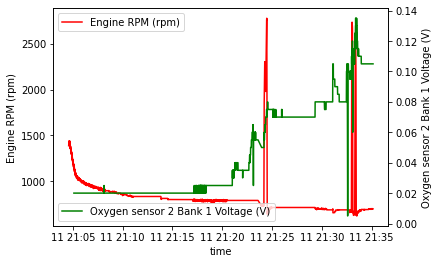

In [40]:
ls_plot(df, rpm, o2_v)

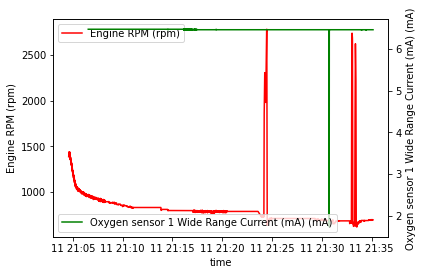

In [41]:
ls_plot(df, rpm, o1_wb)

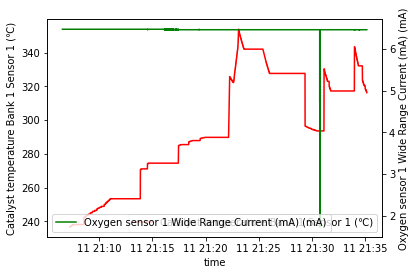

In [42]:
ls_plot(df, cat, o1_wb)

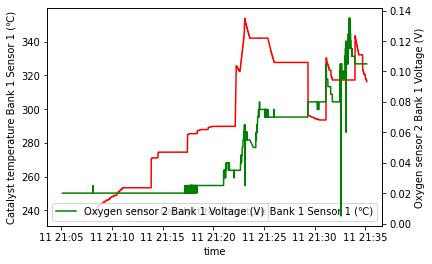

In [43]:
ls_plot(df, cat, o2_v)

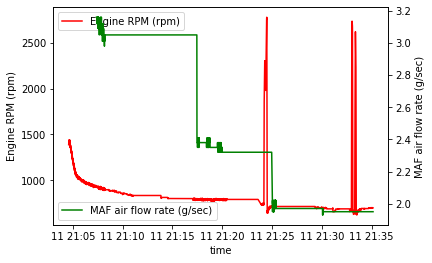

In [45]:
ls_plot(df, rpm, maf)

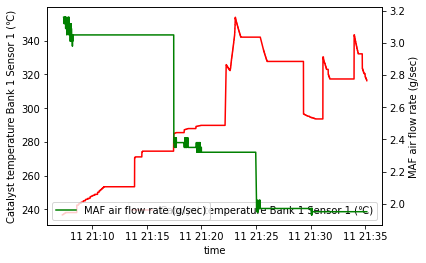

In [46]:
ls_plot(df, cat, maf)

In [14]:
vars.remove('time')

In [16]:
def time_plot(df, var):
    sns.lineplot(data=df, x='time', y=var,color='r', legend='brief', label=var)
    var_str = ''.join(e for e in var if e.isalnum())
    print(var_str)
    plt.savefig('Plots/'+var_str+'.png',dpi=300 ,bbox_inches='tight', transparent=True)
    plt.close()


In [17]:
time_plot(df, maf)

MAFairflowrategsec


In [ ]:
for i in vars:
    time_plot(df, i)

In [18]:
def scat_plot(df, varX, varY):
    #sns.scatterplot(data=df, x=varX, y=varY)
    #sns.displot(df, x=varX, y=varY)
    #sns.jointplot(data=df, x=varX, y=varY, kind='kde')
    g = sns.JointGrid(data=df, x=varX, y=varY)
    g.plot_joint(sns.histplot)
    g.plot_marginals(sns.kdeplot)
    varX_str = ''.join(e for e in varX if e.isalnum())
    varY_str = ''.join(e for e in varY if e.isalnum())
    plt.savefig('Plots/scat_'+varX_str+'_'+varY_str+'.png' ,dpi=300 ,bbox_inches='tight', transparent=True)
    plt.show()
    plt.close()


In [ ]:
scat_plot(df, rpm, maf)

In [ ]:
for i in o_list:
    scat_plot(df, rpm, i)